In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet

#### 利用 pandas-datareader 將資料讀進來

In [3]:
import pandas_datareader.data as web

In [4]:
df = web.DataReader("2330.TW", "yahoo", start="2014-9-1", end="2019-8-31")
# 顯示出台積電過去五年的股票，資料的來源是yahoo

In [5]:
df.head()
# 顯示前五筆的資料，看看裡面包含了哪些數據

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-01,128.5,125.0,125.0,128.5,36304000.0,106.702423
2014-09-02,128.0,125.5,128.0,126.0,19182000.0,104.626495
2014-09-03,128.0,125.5,127.0,128.0,24561000.0,106.287239
2014-09-04,128.0,126.0,128.0,127.5,21641000.0,105.872055
2014-09-05,128.5,125.5,128.5,127.0,20096000.0,105.456871


In [6]:
df.tail()
# 顯示後五筆的資料

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,250.5,248.5,249.0,248.5,31678620.0,244.848755
2019-08-27,251.0,248.5,250.5,250.0,50234951.0,246.326721
2019-08-28,253.0,250.5,250.5,252.0,15132882.0,248.297318
2019-08-29,254.0,251.0,253.0,254.0,19587767.0,250.267944
2019-08-30,259.0,256.0,256.5,259.0,35184201.0,255.194489


因為資料裡面只有收盤價（Adj Close），所以接下來使用使用收盤價格做分析（股票在一天交易结束時候的最終價格）

### 移動平均值  (Moving Average,MA) 

移動平均是透過不斷更新平均成本用以平滑價格，這個方法有助於降低價格中的"noise"，即數據中存在這錯誤或異常(偏離期望值)的數據，這會對數據的分析造成干擾。

In [7]:
P = df["Adj Close"]

In [8]:
MA = P.rolling(window=100).mean()
# 計算股票收盤價最後 100 個窗口（100天）的移動平均值，再取出每個窗口的移動平均值。

In [9]:
P.tail()
# 顯示最後 10 筆移動平均值

Date
2019-08-26    244.848755
2019-08-27    246.326721
2019-08-28    248.297318
2019-08-29    250.267944
2019-08-30    255.194489
Name: Adj Close, dtype: float64

In [10]:
from matplotlib import style
import matplotlib as mpl
## 為了美化圖形

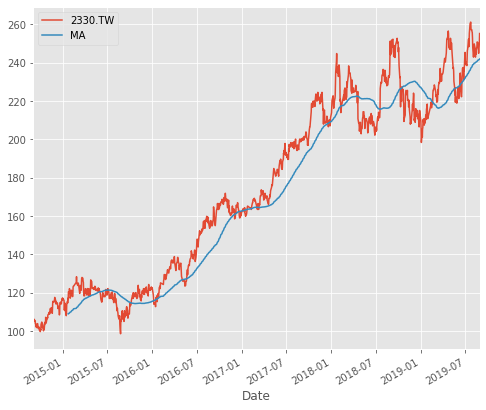

In [11]:
mpl.rc('figure', figsize=(8, 7))

style.use('ggplot')

P.plot(label='2330.TW')

MA.plot(label='MA')

plt.legend()

因為藍色的線就是移動平均值，移動平均讓曲線更加平滑，顯示出股票價格上漲或下跌的趨勢讓人更加容易了解。

正常而言，在股市低迷的時候應該買進，股市上漲時要賣出。

### 預期收益率（Expected Yield）

預期收益是為了衡量投資收益機率分布的平均值或期望值。

計算公式如下：
$$r_t = \frac{P_t - P_{t-1}}{P_{t-1}}$$

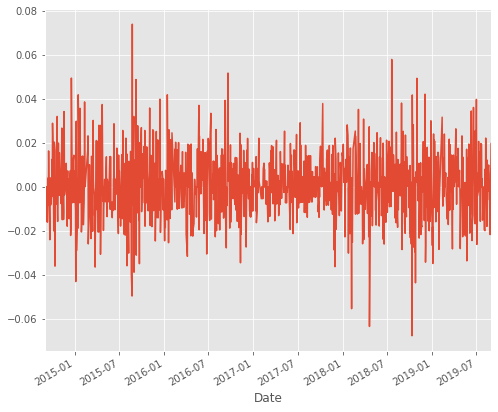

In [12]:
rate = P / P.shift(1) - 1

rate.plot(label='return')

一般而言，如果是風險趨避者，理想的股票收益會希望是高而且穩定的，但由近五年的趨勢圖可以看出在2015及2019近年末的時候，漲跌幅度約6%，有可能不會購買這支股票。

### 預測 2020 年股價

In [13]:
from stocker import Stocker

In [14]:
model = Prophet(daily_seasonality=True)

In [15]:
df1 = pd.DataFrame(df['Adj Close']).reset_index().rename(columns={'Date':'ds', 'Adj Close':'y'})

In [16]:
df1.tail()

,ds,y
1217,2019-08-26,244.848755
1218,2019-08-27,246.326721
1219,2019-08-28,248.297318
1220,2019-08-29,250.267944
1221,2019-08-30,255.194489


In [17]:
model.fit(df1)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

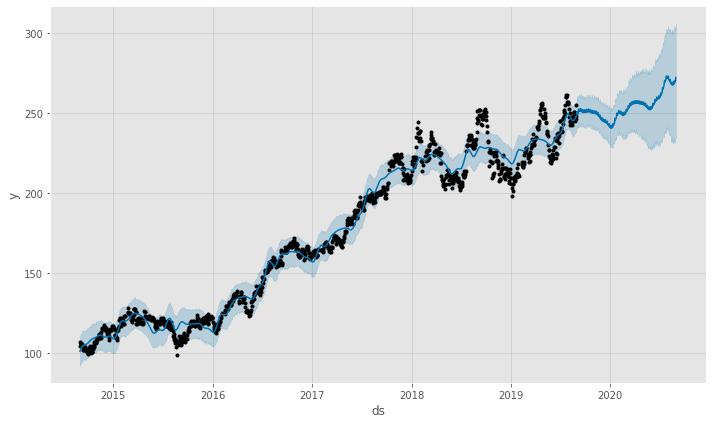

In [18]:
figure = model.plot(forecast)

其中藍色的就是預測出來的股價，而淺藍色區域就是信賴區間，股價大約就會落於此區間內。

由此圖可以看到預測時間越久（沒實際股價的地方），不確定性越大，所以藍色的區間也就稍微變大

#### 遇到的困難、問題

最難的問題應該是要安裝 stocker 那裡試了比較久，後來找出必須到終端機安裝一些套件之後才能順利執行。